# Análise Teórica

![schematics](./assets/schematics.png)

## Bloco passa‑baixa (LP)

A impedância de realimentação é  

$$
Z_f(s)=\frac{R_2}{1+R_2 C_1 s}
$$

e, portanto, a função‑transferência do filtro RC inversor é  

$$
H_{\text{LP}}(s)=\frac{V_{\text{out}}}{V_{\text{in}}}
               =-\frac{Z_f}{R_1}
               =-\frac{R_2}{R_1}\,\frac{1}{1+R_2 C_1 s}.
$$

## Bloco amplificador inversor

$$
H_{\text{inv}}(s) = -\frac{R_4}{R_3}.
$$

## Função‑transferência total

$$
H(s) = H_{\text{LP}}(s)\; H_{\text{inv}}(s)
     = \frac{R_2 R_4}{R_1 R_3}\,
       \frac{1}{1+R_2 C_1 s}.
$$

### Parâmetros importantes

#### Ganho em contínua:

$|H(0)| = \frac{R2 * R4}{R1 * R3}$  
(duas inversões $\rightarrow$ sinal final sem inversão).

##### Polo

$$
\omega_p = -\frac{1}{R_2 C_1}
$$


##### Constante de tempo $\tau$

A forma‐padrão de um filtro de 1ª ordem é  

$$
H(s)=\frac{K}{1+s\tau},
$$  

comparando com  

$$
H(s)=\frac{H(0)}{1+R_2 C_1 s},
$$  

fica claro que


$$
\tau = R_2 C_1.
$$



In [149]:
!pip install -q numpy matplotlib scipy pandas


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


### Substituindo os valores ideais


In [ ]:
import numpy as np
from IPython.display import display, Markdown

def compute_parameters(R1, R2, R3, R4, C1) -> dict:
	"""
	Compute the parameters of the circuit.

	Args:
		R1: Resistance of the first resistor.
		R2: Resistance of the second resistor.
		R3: Resistance of the third resistor.
		R4: Resistance of the fourth resistor.
		C1: Capacitance of the first capacitor.

	Returns:
		dict: A dictionary containing the parameters of the circuit.
		Keys:
			dc_gain: The dc gain of the circuit.
			tau: The time constant of the circuit.
			omega_p: The pole of the circuit.
			f_c: The cutoff frequency of the circuit.
	"""
	# Calculate the DC gain
	dc_gain = (R2 * R4) / (R1 * R3)

	# Calculate the time constant
	tau = R2 * C1

	# Calculate the pole
	omega_p = -1 / tau

	# Calculate the cutoff frequency
	f_c = abs(omega_p) / (2 * np.pi)

	return {'dc_gain': dc_gain, 'tau': tau, 'omega_p': omega_p, 'f_c': f_c}

def display_circuit_parameters_markdown(parameters: dict) -> None:
	"""
	Display the parameters of the circuit in markdown format.
	"""

	display(Markdown(rf"""$$ H(s) = \frac{{{round(parameters['dc_gain'], 3)}}}{{1 + s\,{round(parameters['tau'] * 1e6, 3)}}} $$"""))


	display(Markdown(
	f"| Parâmetro                 | Valor                               | Unidade |\n" +
	f"|---------------------------|-------------------------------------|---------|\n" +
	f"| R1                        | {R1}                                | Ω       |\n" +
	f"| R2                        | {R2}                                | Ω       |\n" +
	f"| R3                        | {R3}                                | Ω       |\n" +
	f"| R4                        | {R4}                                | Ω       |\n" +
	f"| C1                        | {C1 * 1e9}                          | nF      |\n" +
	f"| Ganho DC                  | {round(parameters['dc_gain'], 3)}   |         |\n" +
	f"| Constante de tempo        | {round(parameters['tau'] * 1e6, 3)} | us      |\n" +
	f"| Pólo                      | {round(parameters['omega_p'], 3)}   | rad/s   |\n" +
	f"| Frequência de corte       | {round(parameters['f_c'], 3)}       | Hz      |\n"
	))

# Circuit parameters
R1 = 2e3
R2 = 3e3
R3 = 2e3
R4 = 2e3
C1 = 100e-9

parameters = compute_parameters(R1, R2, R3, R4, C1)
display_circuit_parameters_markdown(parameters)


$$ H(s) = \frac{1.5}{1 + s\,300.0} $$

| Parâmetro                 | Valor                               | Unidade |
|---------------------------|-------------------------------------|---------|
| R1                        | 2000.0                                | Ω       |
| R2                        | 3000.0                                | Ω       |
| R3                        | 2000.0                                | Ω       |
| R4                        | 2000.0                                | Ω       |
| C1                        | 100.0                          | nF      |
| Ganho DC                  | 1.5   |         |
| Constante de tempo        | 300.0 | us      |
| Pólo                      | -3333.333   | rad/s   |
| Frequência de corte       | 530.516       | Hz      |


### Substituindo os valores reais

In [151]:
import numpy as np
from IPython.display import display, Markdown

# Circuit parameters
R1 = 1.97e3
R2 = 2.96e3
R3 = 1.93e3
R4 = 1.98e3
C1 = 65e-9

theoretical_parameters = compute_parameters(R1, R2, R3, R4, C1)
display_circuit_parameters_markdown(theoretical_parameters)

$$ H(s) = \frac{1.541}{1 + s\,192.4} $$

| Parâmetro                 | Valor                               | Unidade |
|---------------------------|-------------------------------------|---------|
| R1                        | 1970.0                                | Ω       |
| R2                        | 2960.0                                | Ω       |
| R3                        | 1930.0                                | Ω       |
| R4                        | 1980.0                                | Ω       |
| C1                        | 65.0                          | nF      |
| Ganho DC                  | 1.541   |         |
| Constante de tempo        | 192.4 | us      |
| Pólo                      | -5197.505   | rad/s   |
| Frequência de corte       | 827.209       | Hz      |


# Etapa experimental 



## Utilidades para leitura de dados do osciloscópio


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def read_scope_csv(path: str) -> tuple[dict, pd.DataFrame]:
	"""
	Parse a Tektronix TDS-series ‘Save → CSV’ file.

	Parameters
	----------
	path : str or Path
		File name produced by the oscilloscope.

	Returns
	-------
	meta : dict
		Instrument metadata (record length, sample interval, etc.).
	data : pandas.DataFrame
		Two columns:
			time_s      – time stamp, seconds
			voltage_V   – channel amplitude, volts
	"""
	# Read the whole file
	cols = ['field', 'value', 'blank', 'time', 'voltage', 'end']
	df = pd.read_csv(path,
					names=cols,
					header=None,
					na_values='',
					skipinitialspace=True)

	# Get the metadata
	meta_rows = df['field'].notna() & (df['field'] != '')
	meta = (df.loc[meta_rows, ['field', 'value']]
			.set_index('field')['value']
			.to_dict())

	# Get the waveform samples
	sample_rows = ~(meta_rows)
	samples = df.loc[sample_rows, ['time', 'voltage']].copy()

	# Convert the numeric text to float
	samples['time']    = pd.to_numeric(samples['time'],    errors='coerce')
	samples['voltage'] = pd.to_numeric(samples['voltage'], errors='coerce')

	# Remove rows that failed the conversion (NaNs)
	data = samples.dropna(subset=['time', 'voltage']) \
				.reset_index(drop=True)

	return meta, data

def read_scope_channels(path: str) -> pd.DataFrame:
	"""
	Read the channels 1 and 2 of a Tektronix TDS-series file.

	Args:
		path: str
			The path to the file. without the CH1.CSV or CH2.CSV suffix.

	Returns:
		df: pandas.DataFrame
	"""
	meta, df = read_scope_csv(path + 'CH1.CSV')

	meta2, df2 = read_scope_csv(path + 'CH2.CSV')

	# Merge the two dataframes on the time column
	df = pd.merge(df, df2, on='time', suffixes=('_CH1', '_CH2'))

	return df


## Montagem experimental 1

Nesta montagem experimental foram utilizados os valores da análise teórica, com os valores reais da montagem experimental.

### Achar a frequencia maxima que pode ser utilizada no gerador de funcoes

Se a constante de tempo é 296us, o tempo de estabilização é 4 vezes a constante de tempo, ou seja, 1.184ms.

logo a frequencia maxima é 1/1.184ms = 844.6Hz.

Para a etapa experimental, foi utilizado o gerador de funcoes com uma frequencia de 199Hz. Para garantir que o sistema estava estável.

### Analise do sinal


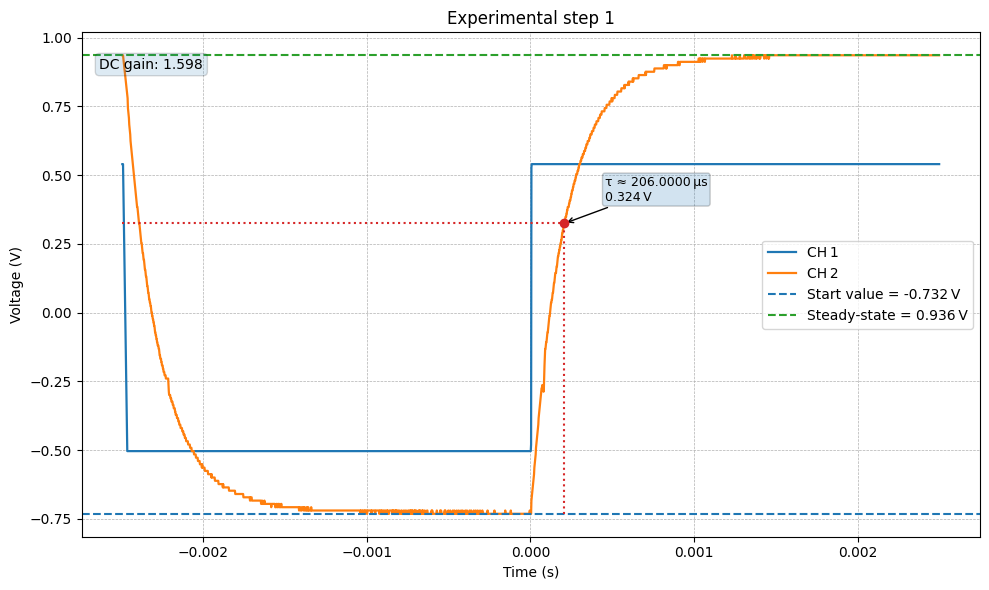

| Parâmetro                 | Valor Prático                               | Unidade |
|---------------------------|-------------------------------------|---------|
| Valor de regime permanente| 0.936                      | V       |
| Valor inicial             | -0.732                       | V       |
| Constante de tempo        | 206.0                   | us      |
| Ganho DC                  | 1.598                 |         |


In [ ]:
import matplotlib.pyplot as plt

df = read_scope_channels('assets/osciloscope/step-1-time-constant/F0002')

def find_start_value_voltage(df: pd.DataFrame, channel: str) -> float:
	# Find the start value of the channel (at time 0)
	start_value = df[df["time"] > 0][f"voltage_{channel}"].iloc[0]
	return start_value

def find_steady_state_voltage(df: pd.DataFrame, channel: str) -> float:
	# Average the last 10% of the data
	return df[f'voltage_{channel}'].iloc[-int(len(df) * 0.1):].mean()

def find_time_constant_index(df: pd.DataFrame, base_channel: str, channel: str) -> int:
	"""
	Find the time constant of the system.

	Args:
		df: pandas.DataFrame
			The dataframe containing the data.

		base_channel: str
			The base channel to compare with.

		channel: str
			The channel to find the time constant of.

	Returns:
		time_constant_index: int
			The index of the time constant in the dataframe.
	"""

	steady_state = find_steady_state_voltage(df, channel)

	# Initial value of the response channel at the instant of the step
	initial_value = find_start_value_voltage(df, channel)

	# Target value: 63.2 % of the way to steady state
	target_value = initial_value + (0.632 * (steady_state - initial_value))


	df_after_step = df[df["time"] > 0]

	time_constant_index = df_after_step[df_after_step[f"voltage_{channel}"] >= target_value].index[0]
	return time_constant_index



def find_dc_gain(df: pd.DataFrame) -> float:
	steady_state_ch1 = find_steady_state_voltage(df, "CH1")
	initial_value_ch1 = find_start_value_voltage(df, "CH1")
	steady_state_ch2 = find_steady_state_voltage(df, "CH2")
	initial_value_ch2 = find_start_value_voltage(df, "CH2")

	vpp_ch1 = steady_state_ch1 - initial_value_ch1
	vpp_ch2 = steady_state_ch2 - initial_value_ch2

	dc_gain = vpp_ch2 / vpp_ch1

	return dc_gain

def plot_step_response(name: str, df: pd.DataFrame, start_value: float, steady_state: float, tau_time: float, tau_amp: float, dc_gain: float):


	plt.figure(figsize=(10, 6))

	plt.plot(df['time'], df['voltage_CH1'], label='CH 1', lw=1.6)
	plt.plot(df['time'], df['voltage_CH2'], label='CH 2', lw=1.6)

	# Start value line
	plt.axhline(
		start_value,
		color='tab:blue',
		linestyle='--',
		label=f'Start value = {start_value:.3f} V'
	)

	# Steady state line
	plt.axhline(
		steady_state,
		color='tab:green',
		linestyle='--',
		label=f'Steady‑state = {steady_state:.3f} V'
	)

	# Time constant marker and helper lines
	plt.scatter(tau_time, tau_amp, color='tab:red', zorder=5)
	plt.vlines(tau_time, ymin=min(df['voltage_CH2'].min(), df['voltage_CH1'].min()),
				ymax=tau_amp, colors='tab:red', linestyles=':')
	plt.hlines(tau_amp, xmin=df['time'].min(), xmax=tau_time,
				colors='tab:red', linestyles=':')

	plt.annotate(f'τ ≈ {tau_time * 1e6:.4f} µs\n{tau_amp:.3f} V',
				xy=(tau_time, tau_amp),
				xytext=(tau_time + 0.05*(df["time"].max()-df["time"].min()),
					tau_amp + 0.05*(df["voltage_CH2"].max()-df["voltage_CH2"].min())),
				arrowprops=dict(arrowstyle='->'),
				fontsize=9,
				bbox=dict(boxstyle='round,pad=0.2', alpha=0.2))

	# DC‑gain text box (top‑left corner)
	plt.text(0.02, 0.95, f'DC gain: {dc_gain:.3f}',
			transform=plt.gca().transAxes,
			ha='left', va='top',
			bbox=dict(boxstyle='round', alpha=0.15))

	plt.xlabel('Time (s)')
	plt.ylabel('Voltage (V)')
	plt.title(name)
	plt.grid(True, which='both', linestyle='--', linewidth=0.5)
	plt.legend()

	plt.tight_layout()
	plt.show()



	display(Markdown(
		f"| Parâmetro                 | Valor Prático                               | Unidade |\n" +
		f"|---------------------------|-------------------------------------|---------|\n" +
		f"| Valor de regime permanente| {steady_state}                      | V       |\n" +
		f"| Valor inicial             | {start_value}                       | V       |\n" +
		f"| Constante de tempo        | {tau_time * 1e6 }                   | us      |\n" +
		f"| Ganho DC                  | {round(dc_gain, 3)}                 |         |\n"
	))

start_value = find_start_value_voltage(df, "CH2")
steady_state = find_steady_state_voltage(df, "CH2")
time_constant_index = find_time_constant_index(df, "CH1", "CH2")
tau_time = df['time'].iloc[time_constant_index]
tau_amp = df['voltage_CH2'].iloc[time_constant_index]
dc_gain = find_dc_gain(df)

plot_step_response('Experimental step 1', df, start_value, steady_state, tau_time, tau_amp, dc_gain)


### Analise do sinal ao duplicar a amplitude do sinal de entrada



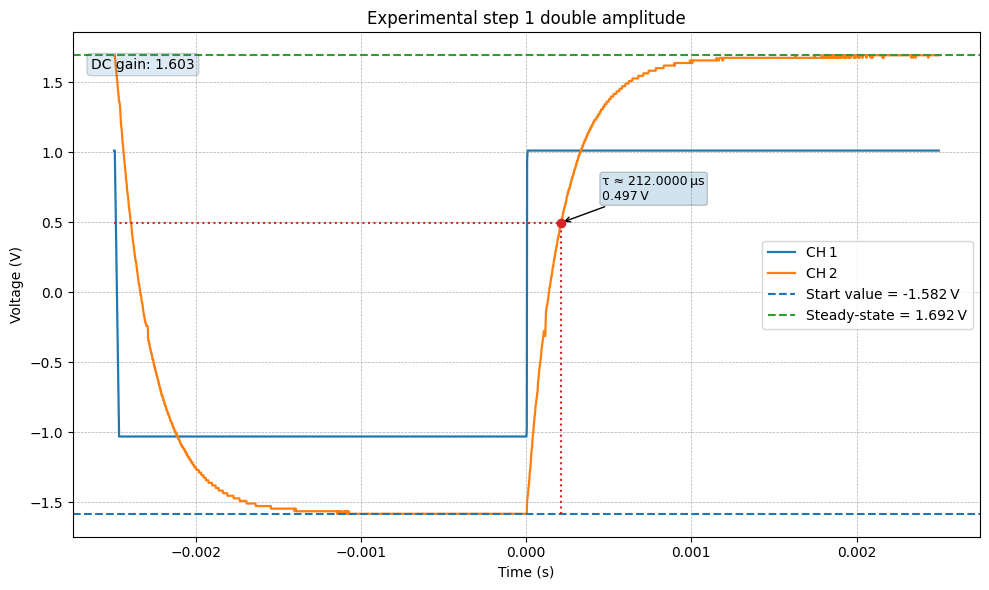

| Parâmetro                 | Valor Prático                               | Unidade |
|---------------------------|-------------------------------------|---------|
| Valor de regime permanente| 1.6918354838709675                      | V       |
| Valor inicial             | -1.5824                       | V       |
| Constante de tempo        | 212.0                   | us      |
| Ganho DC                  | 1.603                 |         |


In [ ]:
import matplotlib.pyplot as plt

df = read_scope_channels('assets/osciloscope/step-1-double-amplitude/F0006')

start_value_double = find_start_value_voltage(df, "CH2")
steady_state_double = find_steady_state_voltage(df, "CH2")
time_constant_index_double = find_time_constant_index(df, "CH1", "CH2")
tau_time_double = df['time'].iloc[time_constant_index_double]
tau_amp_double = df['voltage_CH2'].iloc[time_constant_index_double]
dc_gain_double = find_dc_gain(df)

plot_step_response('Experimental step 1 double amplitude', df, start_value_double, steady_state_double, tau_time_double, tau_amp_double, dc_gain_double)


### Comparação entre os sinais

Como pode ser observado na tabela a seguir, mesmo duplicando a entrada o comportamento do sistema não se alterou.

Também pode ser observado que o sistema pratico apresentou ganho e constante de tempo parecidos com o teórico. As pequenas diferenças podem ser atribuídas as não idealidades do amplificador operacional.


In [ ]:
theoretical_tau =round(theoretical_parameters['tau'] * 1e6, 3)
theoretical_dc_gain = round(theoretical_parameters['dc_gain'], 3)

display(Markdown(
	f"| Parâmetro                 |Valor Teórico         |Valor Prático       |Valor Prático Dobro da Amplitude | Unidade |\n" +
	f"|---------------------------|----------------------|---------------------|---------------------------------|---------|\n" +
	f"| Valor de regime permanente|  X                   | {steady_state}      |{steady_state_double}            | V       |\n" +
	f"| Valor inicial             |  X                   | {start_value}       |{start_value_double}             | V       |\n" +
	f"| Constante de tempo        |{theoretical_tau}     | {tau_time * 1e6 }   |{tau_time_double * 1e6}          | us      |\n" +
	f"| Ganho DC                  |{theoretical_dc_gain} | {round(dc_gain, 3)} |{round(dc_gain_double, 3)}       |         |\n"
))

| Parâmetro                 |Valor Teórico         |Valor Prático       |Valor Prático Dobro da Amplitude | Unidade |
|---------------------------|----------------------|---------------------|---------------------------------|---------|
| Valor de regime permanente|  X                   | 0.936      |1.6918354838709675            | V       |
| Valor inicial             |  X                   | -0.732       |-1.5824             | V       |
| Constante de tempo        |192.4     | 206.0   |212.0          | us      |
| Ganho DC                  |1.541 | 1.598 |1.603       |         |


## Montagem experimental 2

Para esta montagem o resistor R2 foi diminuido pela metade.

Foi de 2.96kΩ para 1.47Ω.

### Análise teórica

Alterando-se o valor de R₂ à metade, o que acontecerá com a constante de tempo do sistema? Ele ficará mais lento ou mais rápido? E o polo, como se altera? Haverá mudança no ganho DC? Justifique. Proceda à alteração, obtenha a resposta do sistema e determine a função de transferência.

Ao se reduzir o resistor R2 pela metade, a constante de tempo do sistema também diminui pela metade. O sistema ficará mais rápido, pois a constante de tempo é inversamente proporcional à frequência de corte. O polo também se desloca no plano complexo para a esquerda, indicando que o sistema se torna mais rápido. O ganho DC se altera, pois na topologia utilizada, R2 faz parte do cálculo do ganho.

In [156]:
# Circuit parameters
R1 = 1.97e3
R2 = 1.47e3
R3 = 1.93e3
R4 = 1.98e3
C1 = 65e-9

parameters_halved_r2 = compute_parameters(R1, R2, R3, R4, C1)
display_circuit_parameters_markdown(parameters_halved_r2)

$$ H(s) = \frac{0.766}{1 + s\,95.55} $$

| Parâmetro                 | Valor                               | Unidade |
|---------------------------|-------------------------------------|---------|
| R1                        | 1970.0                                | Ω       |
| R2                        | 1470.0                                | Ω       |
| R3                        | 1930.0                                | Ω       |
| R4                        | 1980.0                                | Ω       |
| C1                        | 65.0                          | nF      |
| Ganho DC                  | 0.766   |         |
| Constante de tempo        | 95.55 | us      |
| Pólo                      | -10465.725   | rad/s   |
| Frequência de corte       | 1665.672       | Hz      |


### Analise do sinal

Como pode ser observado tanto na analise teórica quanto na experimental, diminuir o valor de R2 diminui a constante de tempo do sistema como também o ganho DC.


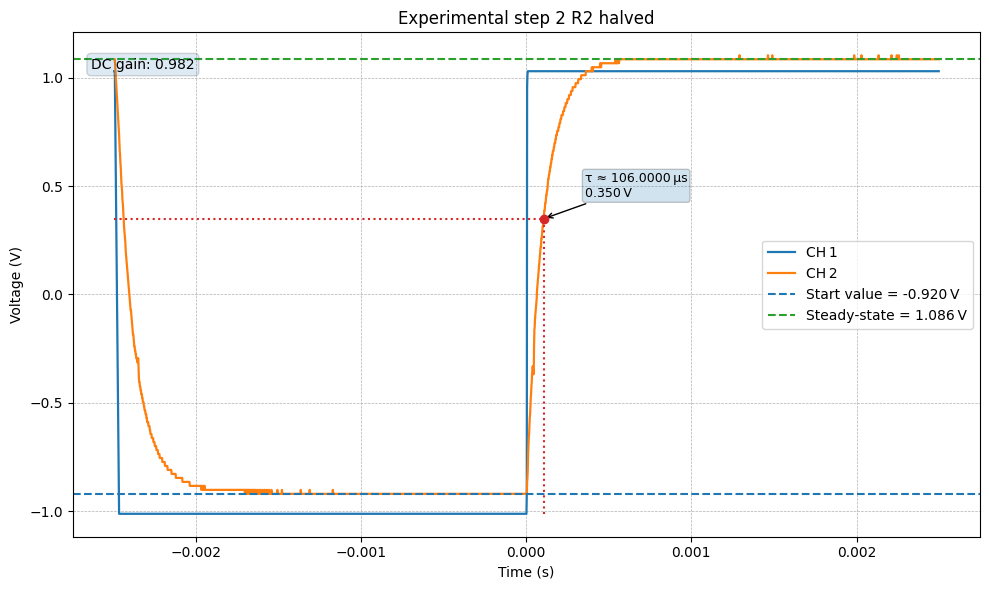

| Parâmetro                 | Valor Prático                               | Unidade |
|---------------------------|-------------------------------------|---------|
| Valor de regime permanente| 1.0859709677419351                      | V       |
| Valor inicial             | -0.92                       | V       |
| Constante de tempo        | 106.0                   | us      |
| Ganho DC                  | 0.982                 |         |


In [ ]:
df = read_scope_channels('assets/osciloscope/step-2-modified-r2/F0014')

start_value_modified_r2 = find_start_value_voltage(df, "CH2")
steady_state_modified_r2 = find_steady_state_voltage(df, "CH2")
time_constant_index_modified_r2 = find_time_constant_index(df, "CH1", "CH2")
tau_time_modified_r2 = df['time'].iloc[time_constant_index_modified_r2]
tau_amp_modified_r2 = df['voltage_CH2'].iloc[time_constant_index_modified_r2]
dc_gain_modified_r2 = find_dc_gain(df)

plot_step_response('Experimental step 2 R2 halved', df, start_value_modified_r2, steady_state_modified_r2, tau_time_modified_r2, tau_amp_modified_r2, dc_gain_modified_r2)

### Analise do sinal ao modificar o circuito para manter o ganho DC do circuito original

Para manter o ganho DC do circuito original, uma abordagem é aumentar o ganho do amplificador da segunda etapa que somente tem ganho DC.

Para isso, foi adicionado um resistor em paralelo com R3 tendo como resistencia equivalente 1k em R3.

#### Função de transferência teórica

Como pode ser observado na função de transferência a seguir, o ganho DC do circuito foi mantido em relação ao circuito original. Porém a constante de tempo continou a mesma que a do circuito com R2 pela metade.

In [158]:
# Circuit parameters
R1 = 1.97e3
R2 = 1.47e3
R3 = 1e3
R4 = 1.98e3
C1 = 65e-9

theoretical_parameters_compensated_gain = compute_parameters(R1, R2, R3, R4, C1)
display_circuit_parameters_markdown(theoretical_parameters_compensated_gain)

$$ H(s) = \frac{1.477}{1 + s\,95.55} $$

| Parâmetro                 | Valor                               | Unidade |
|---------------------------|-------------------------------------|---------|
| R1                        | 1970.0                                | Ω       |
| R2                        | 1470.0                                | Ω       |
| R3                        | 1000.0                                | Ω       |
| R4                        | 1980.0                                | Ω       |
| C1                        | 65.0                          | nF      |
| Ganho DC                  | 1.477   |         |
| Constante de tempo        | 95.55 | us      |
| Pólo                      | -10465.725   | rad/s   |
| Frequência de corte       | 1665.672       | Hz      |


#### Analise do sinal experimental

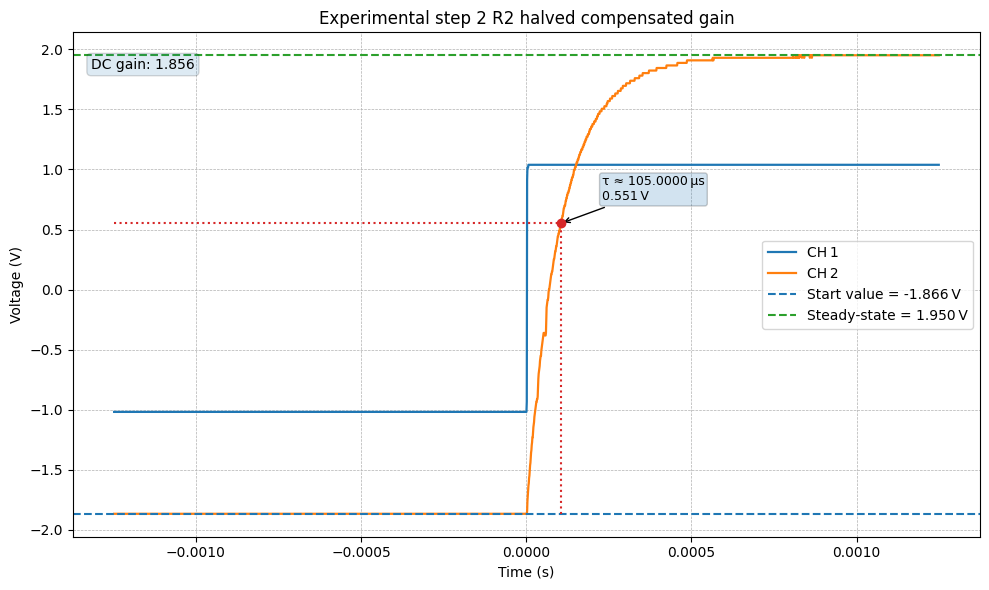

| Parâmetro                 | Valor Prático                               | Unidade |
|---------------------------|-------------------------------------|---------|
| Valor de regime permanente| 1.9503999999999992                      | V       |
| Valor inicial             | -1.8656                       | V       |
| Constante de tempo        | 105.0                   | us      |
| Ganho DC                  | 1.856                 |         |


In [161]:
df = read_scope_channels('assets/osciloscope/step-2-compensated-gain/F0019')

start_value_modified_r2_compensated_gain = find_start_value_voltage(df, "CH2")
steady_state_modified_r2_compensated_gain = find_steady_state_voltage(df, "CH2")
time_constant_index_modified_r2_compensated_gain = find_time_constant_index(df, "CH1", "CH2")
tau_time_modified_r2_compensated_gain = df['time'].iloc[time_constant_index_modified_r2_compensated_gain]
tau_amp_modified_r2_compensated_gain = df['voltage_CH2'].iloc[time_constant_index_modified_r2_compensated_gain]
dc_gain_modified_r2_compensated_gain = find_dc_gain(df)

plot_step_response('Experimental step 2 R2 halved compensated gain', df, start_value_modified_r2_compensated_gain, steady_state_modified_r2_compensated_gain, tau_time_modified_r2_compensated_gain, tau_amp_modified_r2_compensated_gain, dc_gain_modified_r2_compensated_gain)

### Comparação entre os sinais

Como pode ser observado na tabela a seguir, mudanças na primeira etapa do circuito alteram o ganho e a velocidade de resposta do sistema.

Já a segunda etapa do circuito apenas altera o ganho DC do sistema.

Com isso é possivel ajustar a velocidade de resposta modificando a primeira etapa do circuito e compensar a mudança de ganho com a segunda etapa.



In [ ]:
theoretical_tau =round(theoretical_parameters['tau'] * 1e6, 3)
theoretical_dc_gain = round(theoretical_parameters['dc_gain'], 3)

display(Markdown(
	f"| Parâmetro                 |Valor Teórico Circuito Original |Valor Prático Metade de R2       |Valor Prático Metade de R2 Com Ganho DC Compensado | Unidade |\n" +
	f"|---------------------------|--------------------------------|---------------------------------|---------------------------------------------------|---------|\n" +
	f"| Valor de regime permanente|  X                             | {steady_state_modified_r2}      |{steady_state_modified_r2_compensated_gain}        | V       |\n" +
	f"| Valor inicial             |  X                             | {start_value_modified_r2}       |{start_value_modified_r2_compensated_gain}         | V       |\n" +
	f"| Constante de tempo        |{theoretical_tau}               | {tau_time_modified_r2 * 1e6 }   |{tau_time_modified_r2_compensated_gain * 1e6}      | us      |\n" +
	f"| Ganho DC                  |{theoretical_dc_gain}           | {round(dc_gain_modified_r2, 3)} |{round(dc_gain_modified_r2_compensated_gain, 3)}   |         |\n"
))

| Parâmetro                 |Valor Teórico Circuito Original |Valor Prático Metade de R2       |Valor Prático Metade de R2 Com Ganho DC Compensado | Unidade |
|---------------------------|--------------------------------|---------------------------------|---------------------------------------------------|---------|
| Valor de regime permanente|  X                             | 1.0859709677419351      |1.9503999999999992        | V       |
| Valor inicial             |  X                             | -0.92       |-1.8656         | V       |
| Constante de tempo        |192.4               | 106.0   |105.0      | us      |
| Ganho DC                  |1.541           | 0.982 |1.856   |         |
